# Computational Methods in Bayesian Analysis

The process of conducting Bayesian inference can be broken down into three general steps (Gelman *et al.* 2013):

![](images/123.png)

### Step 1: Specify a probability model

As was noted above, Bayesian statistics involves using probability models to solve problems. So, the first task is to *completely specify* the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density.

This step involves making choices.

- what is the form of the sampling distribution of the data?
- what form best describes our uncertainty in the unknown parameters?

### Step 2: Calculate a posterior distribution

The mathematical form \\(p(\theta | y)\\) that we associated with the Bayesian approach is referred to as a **posterior distribution**.

> posterior /pos·ter·i·or/ (pos-tēr´e-er) later in time; subsequent.

Why posterior? Because it tells us what we know about the unknown \\(\theta\\) *after* having observed \\(y\\).

This posterior distribution is formulated as a function of the probability model that was specified in Step 1. Usually, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest is perhaps the major contributing factor for the lack of widespread adoption of Bayesian methods for data analysis. Various strategies for doing so comprise this tutorial.

**But**, once the posterior distribution is calculated, you get a lot for free:

- point estimates
- credible intervals
- quantiles
- predictions

### Step 3: Check your model

Though frequently ignored in practice, it is critical that the model and its outputs be assessed before using the outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

- does the model fit data?
- are the conclusions reasonable?
- are the outputs sensitive to changes in model structure?


## Example: binomial calculation

Binomial model is suitable for data that are generated from a sequence of exchangeable Bernoulli trials. These data can be summarized by $y$, the number of times the event of interest occurs, and $n$, the total number of trials. The model parameter is the expected proportion of trials that an event occurs.

\\[p(Y|\theta) = \frac{n!}{y! (n-y)!} \theta^{y} (1-\theta)^{n-y}\\]

where $y \in \{0, 1, \ldots, n\}$ and $p \in [0, 1]$.

To perform Bayesian inference, we require the specification of a prior distribution. A reasonable choice is a uniform prior on [0,1] which has two implications:

1. makes all probability values equally probable *a priori* 
2. makes calculation of the posterior easy

The second task in performing Bayesian inference is, given a fully-specified model, to calculate a posterior distribution. As we have specified the model, we can calculate a posterior distribution up to a proportionality constant (that is, a probability distribution that is **unnormalized**):

$$P(\theta | n, y) \propto P(y | n, \theta) P(\theta) = \theta^y (1-\theta)^{n-y}$$

We can present different posterior distributions as a function of different realized data.

We can also calculate posterior estimates for $\theta$ by maximizing the unnormalized posterior using optimization. 

### Exercise: posterior estimation

Write a function that returns posterior estimates of a binomial sampling model using a uniform prior on the unknown probability. Plot the posterior densities for each of the following datasets:

1. n=5, y=3
2. n=20, y=12
3. n=100, y=60
4. n=1000, y=600

what type of distribution do these plots look like?

In [47]:
# Write your answer here

## Informative Priors

Formally, we justify a non-informative prior by the **Principle of Insufficient Reason**, which states that uniform probability is justified when there is nothing known about the parameter in question. Frequently, it is inappropriate to employ an uninformative prior as we have done above. For some distributions there is no clear choice of such a prior, particularly when parameters are transformed. For example, a flat prior on the real line is not flat on the unit interval. 

There are two alternative interpretations of the prior distribution.

1. **Population prior**: a distribution that represents a notional population of values for the parameter, from which those in the current experiment/study have been drawn.
2. **Knowledge prior**: a distribution that represents our uncertainty about the true value of the parameter.

In either case, a prior distribution should include in its support all parameter values that are plausible.

Choosing an informative prior presents an analytic challenge with respect to the functional form of the prior distribution. We would like a prior that results in a posterior distribution that is simple to work with. Taking our binomial likelihood again as an example:

$$P(\theta | n, y) \propto \theta^y (1-\theta)^{n-y}$$

we can see that it is of the general form $\theta^a (1-\theta)^b$. Thus, we are looking for a parametric distribution that describes the distribution of or uncertainty in $\theta$ that is of this general form. The **beta distribution** satisfies these criteria:

$$P(\theta | \alpha, \beta) \propto \theta^{\alpha-1} (1-\theta)^{\beta-1}$$

The parameters $\alpha, \beta$ are called **hyperparameters**, and here they suggest prior information corresponding to $\alpha-1$ "successes" and $\beta-1$ failures. 

Let's go ahead and calculate the posterior distribution:

$$\begin{eqnarray}
P(\theta | n, y) &\propto& \theta^y (1-\theta)^{n-y} \theta^{\alpha-1} (1-\theta)^{\beta-1} \\
    &=& \theta^{y+\alpha-1} (1-\theta)^{n-y+\beta-1} \\
    &=& \text{Beta}(\alpha + y, \beta + n -y) \\
\end{eqnarray}$$

So, in this instance, the posterior distribution follows the same functional form as the prior. This phenomenon is referred to as **conjugacy**, whereby the beta distribution is in the conjugate family for the binomial sampling distribution.

> What is the posterior distribution when a Beta(1,1) prior is used?

Formally, we defined conjugacy by saying that a class $\mathcal{P}$ is a conjugate prior for the class $\mathcal{F}$ of likelihoods if:

$$P(\theta | y) \propto f(y|\theta) p(\theta) \in \mathcal{P} \text{ for all } f \in \mathcal{F} \text{ and } p \in \mathcal{P}$$

This definition is quite vague for practical application, so we are more interested in **natural** conjugates, whereby the conjugacy is specific to a particular distribution, and not just a class of distributions.

In the case of the binomial model with a beta prior, we can now analytically calculate the posterior mean and variance for the model:

$$E[\theta|n,y] = \frac{\alpha + y}{\alpha + \beta + n}$$

$$\begin{eqnarray}
\text{Var}[\theta|n,y] &=& \frac{(\alpha + y)(\beta + n - y)}{(\alpha + \beta + n)^2(\alpha + \beta + n +1)} \\
&=& \frac{E[\theta|n,y] (1-E[\theta|n,y])}{\alpha + \beta + n +1}
\end{eqnarray}$$

Notice that the posterior expectation will always fall between the sample and prior means.

Notice also what happens when $y$ and $n-y$ get large.

## Exercise: probability of female birth given placenta previa

Placenta previa is an unusual condition of pregnancy in which the placenta is implanted low in the uterus, complicating a normal delivery. An German study of the sex of placenta previa births found that of 980 births, 437 were female. 

How much evidence does this provide for the claim that the proportion of female births in the population of placenta previa births $\theta$ is less than 0.485 (this is the proportion of female births in the general population)?

1. Calculate the the posterior distribution for $\theta$ using a uniform prior, and plot the prior, likelihood and posterior on the same axes.

2. Find a prior distribution that has a mean of 0.485 and prior "sample size" of 100. Calculate the posterior distribution and plot the prior, likelihood and posterior on the same axes.

In [48]:
# Write your answer here 

## Approximate Computation

Most interesting Bayesian models cannot be computed analytically in closed form, or simulated from directly using random number generators for standard distributions.

Bayesian analysis often requires integration over multiple dimensions that is intractable both via analytic methods or standard methods of numerical integration.
However, it is often possible to compute these integrals by simulating
(drawing samples) from posterior distributions. For example, consider the expected value of a random variable $\mathbf{x}$:

$$\begin{gathered}
\begin{split}E[{\bf x}] = \int {\bf x} f({\bf x}) d{\bf x}, \qquad
{\bf x} = \{x_1,...,x_k\}\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

where $k$ (the dimension of vector $x$) is perhaps very large. If we can produce a reasonable number of random vectors $\{{\bf x_i}\}$, we can use these values to approximate the unknown integral. This process is known as *Monte Carlo integration*. In general, MC integration allows integrals against probability density functions:

$$\begin{gathered}
\begin{split}I = \int h(\mathbf{x}) f(\mathbf{x}) \mathbf{dx}\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

to be estimated by finite sums:

$$\begin{gathered}
\begin{split}\hat{I} = \frac{1}{n}\sum_{i=1}^n h(\mathbf{x}_i),\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

where $\mathbf{x}_i$ is a sample from $f$. This estimate is valid and useful because:

-   By the strong law of large numbers:

$$\begin{gathered}
\begin{split}\hat{I} \rightarrow I   \mbox{   with probability 1}\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

-   Simulation error can be measured and controlled:

$$Var(\hat{I}) = \frac{1}{n(n-1)}\sum_{i=1}^n
   (h(\mathbf{x}_i)-\hat{I})^2$$

### How is this relevant to Bayesian analysis? 

When we observe data $y$ that we hypothesize as being obtained from a sampling model $f(y|\theta)$, where $\theta$ is a vector of (unknown) model parameters, a Bayesian places a *prior* distribution $p(\theta)$ on the parameters to describe the uncertainty in the true values of the parameters. Bayesian inference, then, is obtained by calculating the *posterior* distribution, which is proportional to the product of these quantities:

$$p(\theta | y) \propto f(y|\theta) p(\theta)$$

unfortunately, for most problems of interest, the normalizing constant cannot be calculated because it involves mutli-dimensional integration over $\theta$.

Returning to our integral for MC sampling, if we replace $f(\mathbf{x})$
with a posterior, $p(\theta|y)$ and make $h(\theta)$ an interesting function of the unknown parameter, the resulting expectation is that of the posterior of $h(\theta)$:

$$E[h(\theta)|y] = \int h(\theta) p(\theta|y) d\theta \approx \frac{1}{n}\sum_{i=1}^n h(\theta)$$

We also require integrals to obtain marginal estimates from a joint model. If $\theta$ is of length $K$, then inference about any particular parameter is obtained by:

$$p(\theta_i|y) \propto \int p(\theta|y) d\theta_{-i}$$

where the `-i` subscript indicates all elements except the $i^{th}$.

## Example: Overdispersion Model

[Tsutakawa et al. (1985)](http://onlinelibrary.wiley.com/doi/10.1002/sim.4780040210/abstract) provides mortality data for stomach cancer among men aged 45-64 in several cities in Missouri. The file `cancer.csv` contains deaths $y_i$ and subjects at risk $n_i$ for 20 cities from this dataset.

In [49]:
import pandas as pd

cancer = pd.read_csv('../data/cancer.csv')
cancer

,y,n
0,0,1083
1,0,855
2,2,3461
3,0,657
4,1,1208
5,1,1025
6,0,527
7,2,1668
8,1,583
9,3,582


If we use a simple binomial model, which assumes independent samples from a binomial distribution with probability of mortality $p$, we can use MLE to obtain an estimate of this probability.

In [50]:
ytotal, ntotal = cancer.sum().astype(float)
p_hat = ytotal/ntotal
p_hat

0.00099331262766165821

However, if we compare the variation of $y$ under this model, it is to small relative to the observed variation:

In [51]:
p_hat*(1.-p_hat)*ntotal

70.929474803436037

In [52]:
cancer.y.var()

141.94473684210527

Hence, the data are strongly overdispersed relative to what is predicted under a model with a fixed probability of death. A more realistic model would allow for these probabilities to vary among the cities. One way of representing this is conjugating the binomial distribution with another distribution that describes the variation in the binomial probability. A sensible choice for this is the **beta distribution**:

$$f(p \mid \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} p^{\alpha - 1} (1 - p)^{\beta - 1}$$

Conjugating this with the binomial distribution, and reparameterizing such that $\alpha = K\eta$ and $\beta = K(1-\eta)$ for $K > 0$ and $\eta \in (0,1)$ results in the **beta-binomial distribution**:

$$f(y \mid K, \eta) = \frac{n!}{y!(n-y)!} \frac{B(K\eta+y, K(1-\eta) + n - y)}{B(K\eta, K(1-\eta))}$$

where $B$ is the beta function.

What remains is to place priors over the parameters $K$ and $\eta$. Common choices for diffuse (*i.e.* vague or uninformative) priors are:

$$\begin{aligned}
p(K) &\propto \frac{1}{(1+K)^2} \cr
p(\eta) &\propto \frac{1}{\eta(1-\eta)}
\end{aligned}$$

These are not normalized, but our posterior will not be normalized anyhow, so this is not an issue.

/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


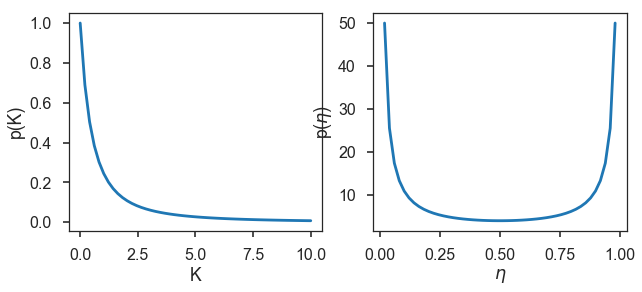

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10,4))
K_x = np.linspace(0, 10)
K_prior = lambda K: 1./(1. + K)**2
axes[0].plot(K_x, K_prior(K_x))
axes[0].set_xlabel('K')
axes[0].set_ylabel('p(K)')

eta_x = np.linspace(0, 1)
eta_prior = lambda eta: 1./(eta*(1.-eta)) 
axes[1].plot(eta_x, eta_prior(eta_x))
axes[1].set_xlabel(r'$\eta$')
axes[1].set_ylabel(r'p($\eta$)')

Now, by multiplying these quantities together, we can obtain a non-normalized posterior.

$$p(K, \eta | \mathbf{y}) \propto \frac{1}{(1+K)^2} \frac{1}{\eta(1-\eta)} \prod_i \frac{B(K\eta+y_i, K(1-\eta) + n_i - y_i)}{B(K\eta, K(1-\eta))}$$

This can be calculated in Python as follows (log-transformed):

In [54]:
from scipy.special import betaln

def betabin_post(params, n, y):

    K, eta = params
    post = betaln(K*eta + y, K*(1.-eta) + n - y).sum()
    post -= len(y)*betaln(K*eta, K*(1.-eta))
    post -= np.log(eta*(1.-eta))
    post -= 2.*np.log(1.+K)
    
    return post
        
betabin_post((15000, 0.003), cancer.n, cancer.y)        

-605.06645607721157

This posterior can be evaluated on a grid to give us an idea about its general shape. We can see that it is skewed in both dimensions:

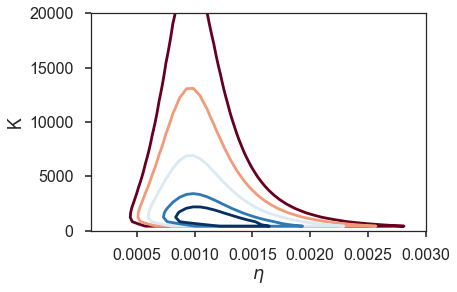

In [55]:
# Create grid
K_x = np.linspace(1, 20000)
eta_x = np.linspace(0.0001, 0.003)

# Calculate posterior on grid
z = np.array([[betabin_post((K, eta), cancer.n, cancer.y) 
               for eta in eta_x] for K in K_x])

# Plot posterior
x, y = np.meshgrid(eta_x, K_x)
cplot = plt.contour(x, y, z-z.max(), [-4, -3, -2, -1, -0.5], cmap=plt.cm.RdBu)
plt.ylabel('K')
plt.xlabel('$\eta$');

To deal with the extreme skewness in the precision parameter $K$ and to facilitate modeling, we can transform the beta-binomial parameters to the real line via:

$$\begin{aligned}
\theta_1 &= \log(K) \cr
\theta_2 &= \log\left(\frac{\eta}{1-\eta}\right)
\end{aligned}$$

which we can easily implement by modifiying `betabin_post`:

In [56]:
def betabin_trans(theta, n, y):
    K = np.exp(theta[0])
    eta = 1./(1. + np.exp(-theta[1]))
    
    post = (betaln(K*eta + y, K*(1.-eta) + n - y) - betaln(K*eta, K*(1.-eta))).sum()
    post += theta[0]
    post -= 2.*np.log(1.+np.exp(theta[0]))
    
    return post
    
betabin_trans((10, -7.5), cancer.n, cancer.y)

-576.79668610789224

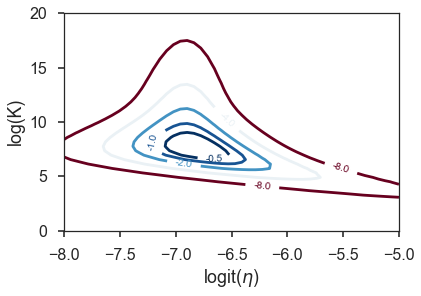

In [57]:
# Create grid
log_K_x = np.linspace(0, 20)
logit_eta_x = np.linspace(-8, -5)

# Calculate posterior on grid
z = np.array([[betabin_trans((t1, t2), cancer.n, cancer.y) 
             for t2 in logit_eta_x] for t1 in log_K_x])

# Plot posterior
x, y = np.meshgrid(logit_eta_x, log_K_x)
cplot = plt.contour(x, y, z - z.max(), levels=[-8, -4, -2, -1, -0.5], cmap=plt.cm.RdBu)
plt.clabel(cplot, inline=1, fontsize=10, fmt='%1.1f')
plt.ylabel('log(K)')
plt.xlabel('logit($\eta$)');

## Approximation Methods

An alternative approach to summarizing a $p$-dimensional posterior distribution involves estimating the mode of the posterior, and approximating the density as multivariate normal. If we consider the logarithm of the unnormalized joint posterior:

$$h(\theta | y) = \log[f(y|\theta) p(\theta)]$$

one way to approximate this function is to usd a second-order Taylor series expansion around the mode $\hat{\theta}$:

$$h(\theta | y) \approx h(\hat{\theta} | y) + \frac{1}{2}(\theta-\hat{\theta})' h''(\hat{\theta} | y) (\theta-\hat{\theta})$$

This form is simply the multivariate normal distribution with $\hat{\theta}$ as the mean and the inverse negative Hessian as the covariance matrix:

$$\Sigma = -h''(\hat{\theta} | y)^{-1}$$

We can apply one of several numerical methods for multivariate optimization to numerically estimate the mode of the posterior. Here, we will use the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm that is provided by SciPy. In addition to returning an estimate of the mode, it returns the estimated variance-covariance matrix, which we will need to parameterize the mutlivariate normal distribution.

Applying this to the beta-binomial posterior estimation problem, we simply provide an initial guess for the mode:

In [58]:
from scipy.optimize import minimize

betabin_trans_min = lambda *args: -betabin_trans(*args)

init_value = (10, -7.5)

opt = minimize(betabin_trans_min, init_value, method='L-BFGS-B',
          args=(cancer.n.values, cancer.y.values))
mode = opt.x
var = opt.hess_inv.todense()
mode, var

(array([ 7.57749772, -6.81890711]), array([[ 1.34564945, -0.17003434],
        [-0.17003434,  0.07407434]]))

Thus, our approximated mode is $\log(K)=7.6$, $\text{logit}(\eta)=-6.8$. We can plug this value, along with the variance-covariance matrix, into a function that returns the kernel of a multivariate normal distribution, and use this to plot the approximate posterior:

In [59]:
det = np.linalg.det 
inv = np.linalg.inv

def lmvn(value, mu, Sigma):
    # Log kernel of multivariate normal
    delta = np.array(value) - mu
    return -0.5 * (np.log(det(Sigma)) + np.dot(delta, np.dot(inv(Sigma), delta)))

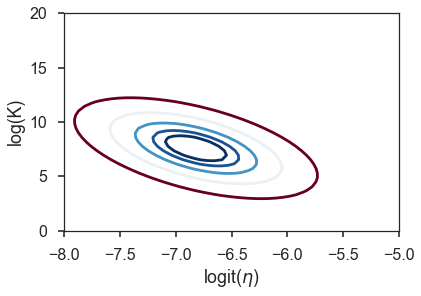

In [60]:
z = np.array([[lmvn((t1, t2), mode, var) 
             for t2 in logit_eta_x] for t1 in log_K_x])
x, y = np.meshgrid(logit_eta_x, log_K_x)
cplot = plt.contour(x, y, z - z.max(), levels=[-8, -4, -2, -1, -0.5], cmap=plt.cm.RdBu)
plt.ylabel('log(K)')
plt.xlabel('logit($\eta$)');

Along with this, we can estimate a 95% probability interval for the estimated mode:

In [61]:
from scipy.stats.distributions import norm

se = np.sqrt(np.diag(var))

mode[0] + norm.ppf(0.025)*se[0], mode[0] + norm.ppf(0.975)*se[0]

(5.3038977225426773, 9.8510977251964071)

In [62]:
mode[1] + norm.ppf(0.025)*se[1], mode[1] + norm.ppf(0.975)*se[1]

(-7.3523427005087774, -6.2854715136757671)

Of course, this approximation is only reasonable for posteriors that are not strongly skewed, bimodal, or leptokurtic (heavy-tailed).

## Rejection Sampling

Though Monte Carlo integration allows us to estimate integrals that are unassailable by analysis and standard numerical methods, it relies on the ability to draw samples from the posterior distribution. For known parametric forms, this is not a problem; probability integral transforms or bivariate techniques (e.g Box-Muller method) may be used to obtain samples from uniform pseudo-random variates generated from a computer. Often, however, we cannot readily generate random values from non-standard posteriors. In such instances, we can use rejection sampling to generate samples.

Posit a function, $f(x)$ which can be evaluated for any value on the support of $x:S_x = [A,B]$, but may not be integrable or easily sampled from. If we can calculate the maximum value of $f(x)$, we can then define a rectangle that is guaranteed to contain all possible values
$(x,f(x))$. It is then trivial to generate points over the box and enumerate the values that fall under the curve.


$$\begin{gathered}
\begin{split}\frac{\mbox{Points under curve}}{\mbox{Points generated}} \times \mbox{box area} = \lim_{n \to \infty} \int_A^B f(x) dx\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

### Example: triangular distribution

In [63]:
def rtriangle(low, high, mode):
    alpha = -1
    while np.random.random() > alpha:
        u = np.random.uniform(low, high)
        if u < mode:
            alpha = (u - low) / (mode - low)
        else:
            alpha = (high - u) / (high - mode)
    return(u)

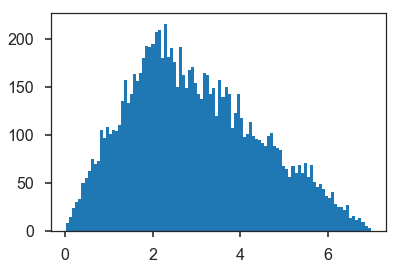

In [64]:
_ = plt.hist([rtriangle(0, 7, 2) for t in range(10000)], bins=100)

This approach is useful, for example, in estimating the normalizing constant for posterior distributions.


If $f(x)$ has **unbounded support** (i.e. infinite tails), such as a Gaussian distribution, a bounding box is no longer appropriate. We must specify a majorizing (or, enveloping) function, $g(x)$, which implies:

$$\begin{gathered}
\begin{split}cg(x) \ge  f(x) \qquad\forall x \in (-\infty,\infty)\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

Having done this, we can now sample ${x_i}$ from $g(x)$ and accept or reject each of these values based upon $f(x_i)$. Specifically, for each draw $x_i$, we also draw a uniform random variate $u_i$ and accept $x_i$
if $u_i < f(x_i)/cg(x_i)$, where $c$ is a constant. This procedure is repeated until a sufficient number of samples is obtained. This approach is made more efficient by choosing an **enveloping distribution** that is “close” to the target distribution, thus maximizing the number of accepted points. 

To apply rejection sampling to the beta-binomial example, we first need to find a majorizing function $g(x)$ from which we can easily draw samples. We have seen in the previous section that the multivariate normal might serve as a suitable candidate, if multiplied by an appropriately large value of $c$. However, the thinness of the normal tails makes it difficult to use as a majorizing function. Instead, a multivariate Student's T distribution offers heavier tails for a suitably-small value for the degrees of freedom $\nu$:

$$f(\mathbf{x}| \nu,\mu,\Sigma) = \frac{\Gamma\left[(\nu+p)/2\right]}{\Gamma(\nu/2)\nu^{p/2}\pi^{p/2}\left|{\Sigma}\right|^{1/2}\left[1+\frac{1}{\nu}({\mathbf x}-{\mu})^T{\Sigma}^{-1}({\mathbf x}-{\mu})\right]^{(\nu+p)/2}}$$

We can draw samples from a multivariate-T density by combining mutlivariate normal and $\chi^2$ random variates:

> ### Generating multivariate-T samples

> If $X$ is distributed multivariate normal $\text{MVN}(\mathbf{0},\Sigma)$ and $S$ is a $\chi^2$ random variable with $\mu$ degrees of freedom, then a multivariate Student's-T random variable $T = T_1,\ldots,T_p$ can be generated by $T_i = \frac{\sqrt{\nu}X_i}{S} + \mu_i$, where $\mu = \mu_1,\ldots,\mu$ is a mean vector.

This is implemented in Python by:

In [65]:
chi2 = np.random.chisquare
mvn = np.random.multivariate_normal

rmvt = lambda nu, S, mu=0, size=1: (np.sqrt(nu) * (mvn(np.zeros(len(S)), S, size).T
                                   / chi2(nu, size))).T + mu

Finally, we need an implementation of the multivariate T probability distribution function, which is as follows:

In [66]:
from scipy.special import gammaln

def mvt(x, nu, S, mu=0): 

    d = len(S)
    n = len(x)
    X = np.atleast_2d(x) - mu
    
    Q = X.dot(np.linalg.inv(S)).dot(X.T).sum()
    log_det = np.log(np.linalg.det(S))
    log_pdf = gammaln((nu + d)/2.) - 0.5 * (d*np.log(np.pi*nu) + log_det) - gammaln(nu/2.)
    log_pdf -= 0.5*(nu + d)*np.log(1 + Q/nu)
    
    return(np.exp(log_pdf))

The next step is to find the constant $c$ that ensures:

$$cg(\theta) \ge  f(\theta|y) \qquad\forall \theta \in (-\infty,\infty)$$

Alternatively, we want to ensure:

$$\log[f(\theta|y)] - \log[g(\theta)] \le c'$$

In [67]:
def calc_diff(theta, n, y, nu, S, mu):
    
    return betabin_trans(theta, n, y) - np.log(mvt(theta, nu, S, mu))

calc_diff_min = lambda *args: -calc_diff(*args)

We can calculate an appropriate value of $c'$ by simply using the approximation method described above on `calc_diff` (tweaked to produce a negative value for minimization):

In [68]:
opt = minimize(calc_diff_min, 
                (12, -7), 
                args=(cancer.n, cancer.y, 4, 2*var, mode), 
                method='bfgs')

In [69]:
opt

      fun: 569.1811686388969
 hess_inv: array([[  6.10884018e-08,   2.04254368e-08],
       [  2.04254368e-08,   8.19388936e-09]])
      jac: array([-0.01561737,  0.79351044])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 208
      nit: 6
     njev: 49
   status: 2
  success: False
        x: array([ 12.01007582,  -6.86883493])

In [70]:
c = opt.fun

Now we can execute a rejection sampling algorithm:

In [71]:
def reject(post, nu, S, mu, n, data, c):
    
    k = len(mode)
    
    # Draw samples from g(theta)
    theta = rmvt(nu, S, mu, size=n)
    
    # Calculate probability under g(theta)
    gvals = np.array([np.log(mvt(t, nu, S, mu)) for t in theta])

    # Calculate probability under f(theta)
    fvals = np.array([post(t, data.n, data.y) for t in theta])
    
    # Calculate acceptance probability
    p = np.exp(fvals - gvals + c)
    
    return theta[np.random.random(n) < p]

In [72]:
nsamples = 1000
sample = reject(betabin_trans, 4, var, mode, nsamples, cancer, c)

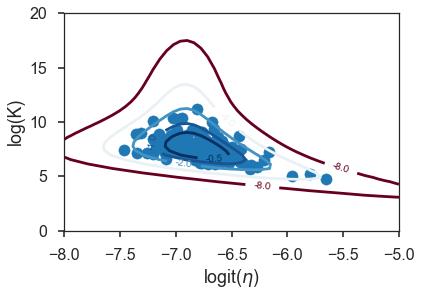

In [73]:
z = np.array([[betabin_trans((t1, t2), cancer.n, cancer.y) 
             for t2 in logit_eta_x] for t1 in log_K_x])
x, y = np.meshgrid(logit_eta_x, log_K_x)
cplot = plt.contour(x, y, z - z.max(), levels=[-8, -4, -2, -1, -0.5], cmap=plt.cm.RdBu)
plt.clabel(cplot, inline=1, fontsize=10, fmt='%1.1f')
plt.ylabel('log(K)');plt.xlabel('logit($\eta$)')
plt.scatter(*sample.T[[1,0]])

Notice that the efficiency of rejection sampling is not very high for this problem.

In [74]:
float(sample.size)/nsamples

0.4

Rejection sampling is usually subject to declining performance as the dimension of the parameter space increases. Further improvement is gained by using optimized algorithms such as importance sampling which, as the name implies, samples more frequently from important areas of the distribution.

## Importance Sampling

As we have seen, the primary difficulty in Bayesian inference is calculating the posterior density for models of moderate-to-high dimension. For example, calculating the posterior mean of some function $h$ requires two difficult integration steps:

$$E[h(\theta) | y] = \frac{\int h(\theta)f(y|\theta) p(\theta) d\theta}{\int f(y|\theta) p(\theta) d\theta} = \frac{\int h(\theta)p(\theta | y) d\theta}{\int p(\theta|y) d\theta}$$

If the posterior $p(\theta|y)$ is a density from which it is easy to sample, we could approximiate these integrals using Monte Carlo simulation, but too often it is not.

Instead, assume that we can draw from a probability density $q(\theta)$ that is some approximation of $p$. We could then write:

$$E[h(\theta) | y] = \frac{\int h(\theta) \frac{p(\theta|y)}{q(\theta)} q(\theta) d\theta}{\int \frac{p(\theta|y)}{q(\theta)} q(\theta) d\theta}$$

Expressed this way, $w(\theta) = p(\theta|y) / q(\theta)$ can be regarded as *weights* for the $M$ values of $\theta$ sampled from $q$ that we can use to correct the sample so that it approximates $h(\theta)$. Specifically, the **importance sampling estimate** of $E[h(\theta) | y]$ is:

$$\hat{h}_{is} = \frac{\sum_{i=1}^{M} h(\theta^{(i)})w(\theta^{(i)})}{\sum_{i=1}^{M} w(\theta^{(i)})}$$

where $\theta^{(i)}$ is the $i^{th}$ sample simulated from $q(\theta)$. The standard error for the importance sampling estimate is:

$$\text{SE}_{is} = \frac{\sqrt{\sum_{i=1}^{M} [(h(\theta^{(i)}) - \hat{h}_{is}) w(\theta^{(i)})]^2}}{\sum_{i=1}^{M} w(\theta^{(i)})}$$

The efficiency of importance sampling is related to the selection of the importance sampling distribution $q$.

### Example: Beta-binomial parameter

As a simple illustration of importance sampling, let's consider again the problem of estimating the paramters of the beta-binomial example. Here, we will use a multivariate T density as the simulation distribution $q$.

Here are 1000 sampled values to use for approximating the posterior:

In [75]:
theta = rmvt(4, var, mode, size=1000)

We can obtain the probability of these values under the posterior density:

In [76]:
f_theta = np.array([betabin_trans(t, cancer.n, cancer.y) for t in theta])

and under the T distribution:

In [77]:
q_theta = mvt(theta, 4, var, mode)

This allows us to calculate the importance weights:

In [78]:
w = np.exp(f_theta - q_theta - max(f_theta - q_theta))

notice that we have subtracted the maximum value of the differences, which normalizes the weights.

Now, we can obtain estimates of the parameters:

In [79]:
theta_si = [(w*t).sum()/w.sum() for t in theta.T]
theta_si

[7.5929404330023216, -6.8167998933203551]

Finally, the standard error of the estimates:

In [80]:
se = [np.sqrt((((theta.T[i] - theta_si[i])* w)**2).sum()/w.sum()) for i in (0,1)]
se

[0.43027645550712063, 0.10096699484896517]

## Sampling Importance Resampling

The importance sampling method can be modified to incorporate weighted bootstrapping, in a procedure called sampling importance resampling (SIR). As previously, we obtain a sample of size $M$ from an importance sampling distribution $q$ and calculate the corresponding weights $w(\theta_i) = p(\theta|y) / q(\theta)$. 

Instead of directly re-weighting the samples from $q$, SIR instead transforms the weights into probabilities via:

$$p_i = \frac{w(\theta_i)}{\sum_{i=1}^M w(\theta_i)}$$

These probabilities are then used to re-sample their respective $\theta_i$ values, with replacement. This implies that the resulting resamples $\theta_i^{\prime}$ will be distributed approximately as the posterior $p(\theta|y)$.

Using again the beta-binomial example, we can take the weights calculated above, and convert them to probabilities:

In [81]:
p_sir = w/w.sum()

The `choice` function in `numpy.random` can be used to generate a random sample from an arbitrary 1-D array.

In [82]:
theta_sir = theta[np.random.choice(range(len(theta)), size=10000, p=p_sir)]

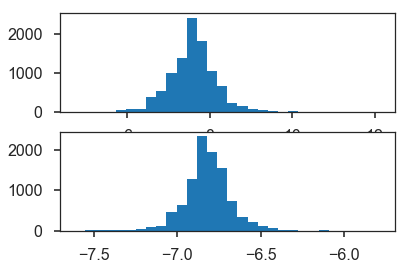

In [83]:
fig, axes = plt.subplots(2)
_ = axes[0].hist(theta_sir.T[0], bins=30)
_ = axes[1].hist(theta_sir.T[1], bins=30)

One advantage of this approach is that one can easily extract a posterior probability interval for each parameter, simply by extracting quantiles from the resampled values.

In [84]:
logK_sample = theta_sir[:,0]
logK_sample.sort()
logK_sample[[250, 9750]]

array([ 6.50084561,  8.83008548])

## Exercise: Sensitivity analysis

Perform a Bayesian sensitivity analysis by performing SIR on the stomach cancer dataset $N$ times, with one observation (a city) removed from the dataset each time. Calculate and plot posterior medians and 95% posterior intervals for each $f(\theta|y_{(-i)})$ to visually analyze the influence of each observation.

In [85]:
# Write your answer here

## References

Chapter 6 of [Givens, Geof H.; Hoeting, Jennifer A. (2012-10-09). Computational Statistics (Wiley Series in Computational Statistics)](http://www.stat.colostate.edu/computationalstatistics/)

Chapter 5 of [Albert, J. (2009). Bayesian computation with R.](http://www.amazon.com/Bayesian-Computation-R-Use/dp/0387922970)